## Ejercicio 4

Modifique el programa del problema anterior para que use un paso adaptativo. Es decir, sea $y_1$ la solución usando paso $h$ e $y_2$ usando $h/2$. Considere su diferencia:
$$
\Delta = |y_2 - y_1|,
$$
y una tolerancia $\epsilon = 10^{-5}$. Programe la siguiente estrategia para ajustar el paso $h$:
* Si $\Delta < \epsilon/2$: acepto $y_2$ y multiplico el paso por 1.5.
* Si $\epsilon/2 < \Delta < \epsilon$: acepto $y_2$ y mantengo el paso.
* Si $\epsilon < \Delta$: rechazo $y_2$, divido el paso por 1.5 y vuelvo a calcular.  

Para $a=1$, $b=3$, grafique las soluciones numéricas $x(t)$ e $y(t)$ y la trayectoria en el espacio de fases, señalando cómo se adapta el paso en los regímenes de variación rápida del oscilador.

Contando la cantidad de pasos en un ciclo, estime la ventaja del algoritmo con respecto a un RK4 de paso fijo con la misma precisión (necesitará un $h\approx 0.01$).

Considere una tolerancia distinta ($\epsilon=10^{-2}$, por ejemplo) y discuta las diferencias.


Si tiene ganas, considere también otros valores del factor de multiplicación del paso (en muchos libros recomiendan el valor 2 en lugar de 1.5, por ejemplo). ¿Qué ocurre con la discretización del tiempo?


In [9]:
#Importo librerías
import numpy as np
import matplotlib.pyplot as plt

In [21]:
np.linalg.norm(np.array([1,2])) - np.sqrt(1 + 4)

0.0

In [95]:
tol = 1e-5

def f(y_vec, a, b):
    '''
    y_vec = (x,y)
    
    '''
    #Asigno variables
    x = y_vec[0]
    y = y_vec[1]

    #Calculo derivadas
    dxdt = a - (b+1)*x + x**2*y
    dydt = b*x - x**2*y

    return np.array([dxdt, dydt])

def RK4(f, h, y_vec, *args):
    '''
    Calcula y_vec^{n+1} para dados y_vec^{n} = y_vec y paso de tiempo h usando f = dy_vec/dt

    '''

    #Calculo los ks
    k1 = h*f(y_vec, *args)
    k2 = h*f(y_vec + k1/2, *args)
    k3 = h*f(y_vec + k2/2, *args)
    k4 = h*f(y_vec + k3, *args)

    return y_vec + k1/6 + (k2+k3)/3 + k4/6

def RK4_adap(f, h, y_vec, *args):
    #Resuelvo con paso h
    y1 = RK4(f, h, y_vec, *args)
    #Resuelvo con paso h/2
    y2 = RK4(f, h/2, y_vec, *args)
    #Calculo la diferencia
    Delta = np.linalg.norm(y2-y1)

    if Delta < tol/2:
        # print("Agrando paso")
        return y2, h*1.5
    elif tol/2 < Delta < tol:
        # print("Mantengo paso")
        return y2, h
    else:
        # print("Achico paso")
        return RK4_adap(f, h/1.5, y_vec, *args)

def solver(y0_vec, T, N, h, *args):
    '''
    
    N: nro máximo de iteraciones
    '''
    y_vec = np.empty([N,2])
    h_vec = np.empty(N) #Valores de h considerados

    #Inicializo
    y_vec[0] = y0_vec
    h_vec[0] = h #Este paso no se está considerando
    t = 0 #tiempo
    i = 0 #índice

    while t < T and i < N-1:
        i += 1
        y_vec[i], h_vec[i] = RK4_adap(f, h_vec[i-1], y_vec[i-1], *args)
        t += h_vec[i]

    if i == N-1:
        print("Se llegó al nro máximo de pasos permitidos")
    if t >= T:
        print("Se llegó al final de la evolución")

    return y_vec, h_vec[1:]


In [99]:
#Condiciones iniciales
x0 = 1
y0 = 2
T = 10 #Tiempo total
h = 0.1 #Tamaño de los pasos
N = 100 #Nro máximo de pasos

a = 1
b = 3



In [100]:
y0_vec = np.array([x0,y0])

#Resuelvo
y_vec, h_vec = solver(y0_vec, T, N, h, a, b)
#Creo el array de tiempos
t_vec = np.empty(len(h_vec) + 1)
t_vec[0] = 0
for i in range(1,len(t_vec)):
    t_vec[i] = t_vec[i-1] + h_vec[i-1]


Se llegó al nro máximo de pasos permitidos


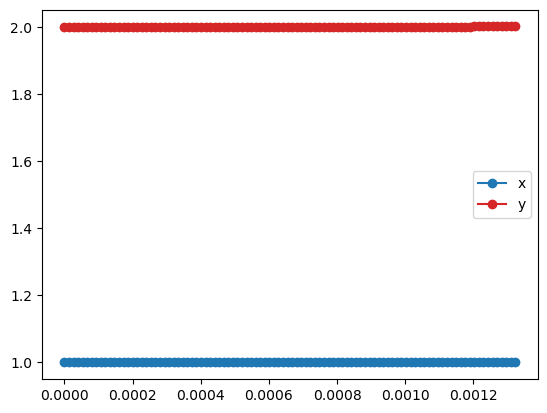

In [101]:
# Grafico x, y vs t
plt.plot(t_vec, y_vec[:,0], "-o", label = "x", color = "tab:blue")
plt.plot(t_vec, y_vec[:,1], "-o",label = "y", color = "tab:red")
plt.legend()